In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load the dataset
airbnb_data = pd.read_csv('Airbnb_data.csv')

# Data exploration
print(airbnb_data.info())
print(airbnb_data.describe())

# Display column names to verify
print("Dataset Columns:", airbnb_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [2]:
# Handle missing numeric columns dynamically
numeric_columns = airbnb_data.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
airbnb_data[numeric_columns] = imputer.fit_transform(airbnb_data[numeric_columns])


# Encode categorical data
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(airbnb_data[['property_type', 'room_type', 'amenities', 'bed_type',
       'cancellation_policy', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'name',
       'neighbourhood', 'thumbnail_url', 'zipcode']])

# Normalize numeric data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(airbnb_data[['id', 'log_price', 'accommodates', 'bathrooms', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds']])

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Identify categorical and numerical columns
categorical_columns = ['property_type', 'room_type', 'cancellation_policy', 'city'] 
numerical_columns = airbnb_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('log_price')  

# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_columns), 
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  
    ]
)

# Define the pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

In [4]:
# Prepare the data
X = airbnb_data.drop('log_price', axis=1)  # Features
y = airbnb_data['log_price']  # Target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"MAE: {mae}")

RMSE: 0.40056492504325414
R²: 0.6876695147707871
MAE: 0.28841104710121296


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


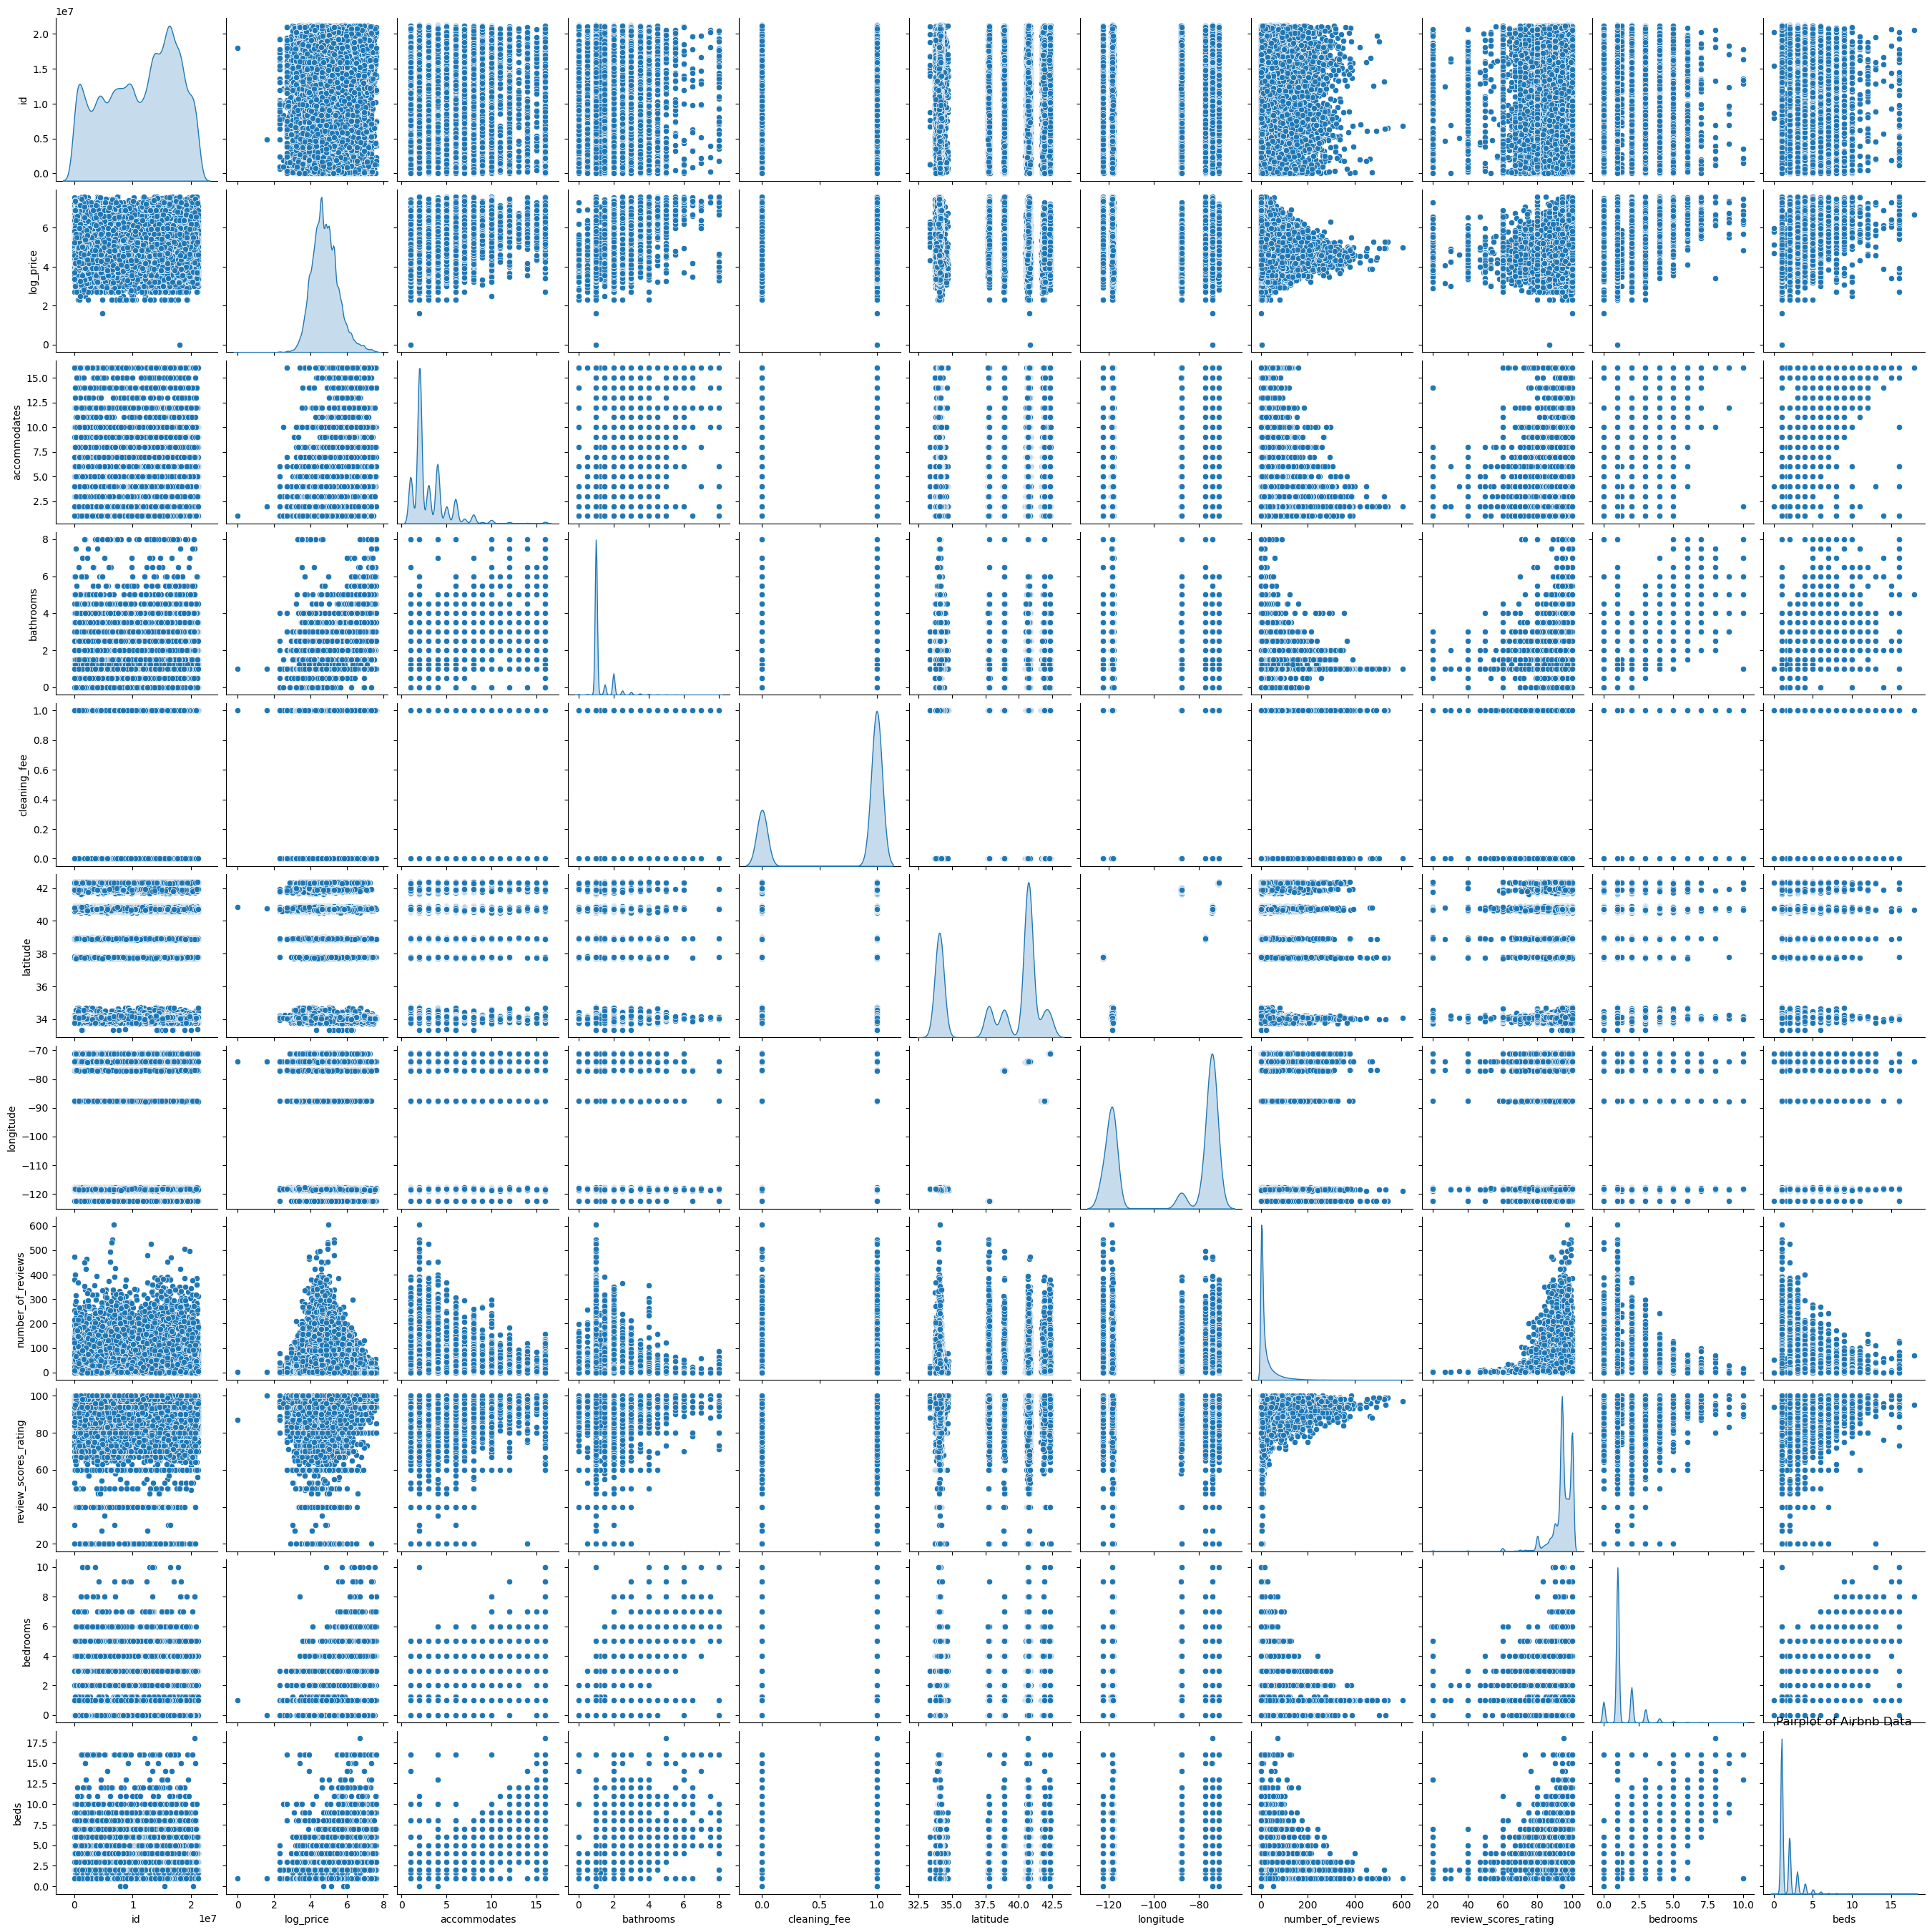

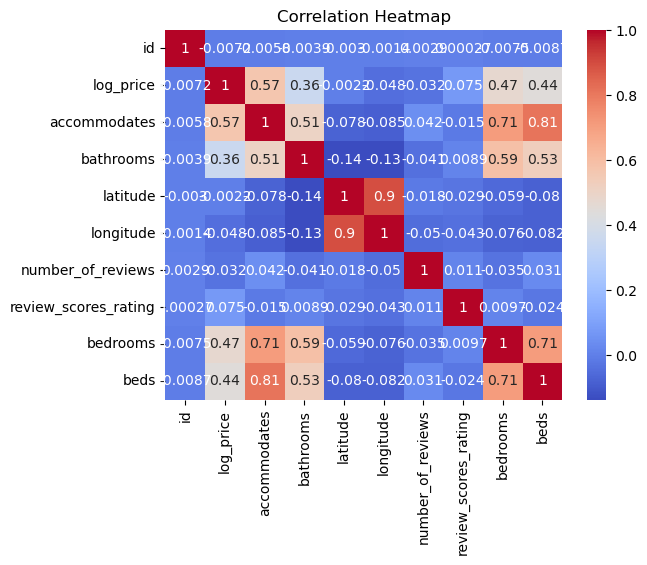

In [8]:
# Exploratory Data Analysis
sns.pairplot(airbnb_data, diag_kind='kde')
plt.title('Pairplot of Airbnb Data')
plt.show()

# Correlation heatmap (only numeric columns)
numeric_data = airbnb_data.select_dtypes(include=['float64', 'int64'])
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Compare multiple regression models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}
for model_name, model in models.items():
    pipeline.set_params(model=model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    results[model_name] = {
        'RMSE': mean_squared_error(y_test, y_pred, squared=False),
        'R2': r2_score(y_test, y_pred)
    }

for model, metrics in results.items():
    print(f'{model}: RMSE={metrics['RMSE']:.2f}, R2={metrics['R2']:.2f}')


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest: RMSE=0.40, R2=0.69
Linear Regression: RMSE=0.72, R2=-0.00
Gradient Boosting: RMSE=0.41, R2=0.67


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


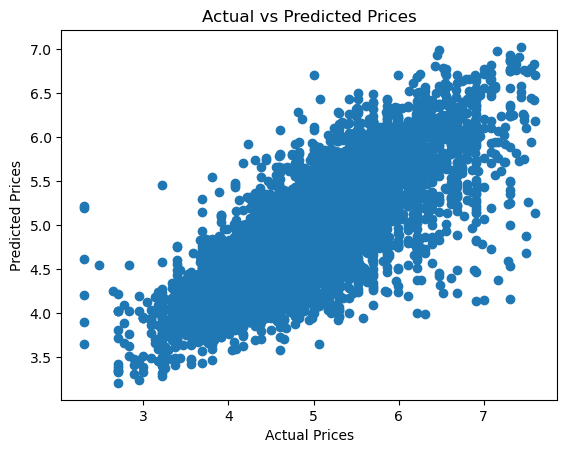

In [9]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()
